<a href="https://colab.research.google.com/github/SINDHUSITA/Titanic-Machine-Learning-from-Disaster/blob/master/Titanic(kaggle).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic: Machine Learning from Disaster

## Importing basic packages

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing Data

In [2]:
dataset = pd.read_csv('train.csv')
pred = pd.read_csv('test.csv')

print("Train data shape: ",dataset.shape,'\n\nHow train data looks: \n',dataset.head())
print("Test data shape: ",pred.shape,'\n\nHow test data looks: \n',pred.head())

Train data shape:  (891, 12) 

How train data looks: 
    PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]
Test data shape:  (418, 11) 

How test data looks: 
    PassengerId  Pclass  ... Cabin Embarked
0          892       3  ...   NaN        Q
1          893       3  ...   NaN        S
2          894       2  ...   NaN        Q
3          895       3  ...   NaN        S
4          896       3  ...   NaN        S

[5 rows x 11 columns]


### Splitting dependent and independent features

In [3]:
print("Independent features are: ",list(dataset.columns[2:]),'\nDependent or Prediction variable: ',dataset.columns[1])
X = dataset.iloc[:,2:]
y = dataset.iloc[:,1:2]

print('Shape of X and y: ',X.shape,y.shape)

Independent features are:  ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'] 
Dependent or Prediction variable:  Survived
Shape of X and y:  (891, 10) (891, 1)


## Handling missing data

In [4]:
nulls = X.isna().sum().sort_values(ascending=False)
print('Number of nulls in each column: \n',nulls)
nulls = y.isna().sum().sort_values(ascending=False)
print('Number of nulls in dependent feature column: ',nulls)

Number of nulls in each column: 
 Cabin       687
Age         177
Embarked      2
Fare          0
Ticket        0
Parch         0
SibSp         0
Sex           0
Name          0
Pclass        0
dtype: int64
Number of nulls in dependent feature column:  Survived    0
dtype: int64


### Handling missing data in AGE column

In [5]:
print("Handling missing values in Age column:\n",X['Age'].head())
print('Nulls initially in age: ',X['Age'].isna().sum())
# replacing missing ages with mean values
X['Age'] = X['Age'].interpolate(method='linear', limit_direction='forward', axis=0)
#X['Age'].fillna((X['Age'].mean()), inplace=True)
print('After handling: ',X['Age'].isna().sum())

Handling missing values in Age column:
 0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64
Nulls initially in age:  177
After handling:  0


### Handling missing data in CABIN column

In [6]:
print("Handling missing values in Cabin column:\n",X['Cabin'].head())
print('\nNulls initially in Cabin column: ',X['Cabin'].isna().sum())
print('Null percentage in total column: ',(X['Cabin'].isna().sum()/len(X['Cabin'])*100))
#Dropping 'Cabin' column as it mostly contains missig values
print("\nShape of train data before dropping Cabin: ",X.shape)
X.drop(columns='Cabin',inplace=True)
print("Shape of train data After dropping Cabin: ",X.shape)

Handling missing values in Cabin column:
 0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

Nulls initially in Cabin column:  687
Null percentage in total column:  77.10437710437711

Shape of train data before dropping Cabin:  (891, 10)
Shape of train data After dropping Cabin:  (891, 9)


### Handling missing data in EMBARKED column

In [7]:
print("\nHandling missing values in Embarked column:\n",X['Embarked'].head())
print('Unique values in Embarked: ',X['Embarked'].unique())
print('Nulls initially in Embarked: ',X['Embarked'].isna().sum())
# replacing missing values with most frequent values
most_freq = X['Embarked'].value_counts().index[0]
X['Embarked'].fillna((most_freq), inplace=True)
print('After handling: ',X['Embarked'].isna().sum())


Handling missing values in Embarked column:
 0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object
Unique values in Embarked:  ['S' 'C' 'Q' nan]
Nulls initially in Embarked:  2
After handling:  0


## Handling Categorical Data

In [8]:
print('Categorical columns in data are:',list(X.loc[:,X.dtypes==object].columns))
# print(df[["RM","LSTAT"]].corr())

Categorical columns in data are: ['Name', 'Sex', 'Ticket', 'Embarked']


### Handling NAME column

In [9]:
print('Number of unique values in this column: ',len(np.unique(X['Name'])))
#One Hot Encoding here is meaning less and a person's name cannot be related to his survival
print('Before dropping Name coulmn, shape of train data:',X.shape)
X.drop(columns='Name',inplace=True)
print('After dropping Name coulmn, shape of train data:',X.shape)

Number of unique values in this column:  891
Before dropping Name coulmn, shape of train data: (891, 9)
After dropping Name coulmn, shape of train data: (891, 8)


### Handling SEX column

In [10]:
print('Unique values in this column with categorical values: ',np.unique(X['Sex']))
#We replace female with 1 and male with 0
def male_female(x):
  if x == 'male':
    return 0
  if x == 'female':
    return 1
X['Sex'] = X['Sex'].apply(male_female)
print('Unique values in this column with numeric values: ',np.unique(X['Sex']))

Unique values in this column with categorical values:  ['female' 'male']
Unique values in this column with numeric values:  [0 1]


### Handling TICKET column

In [11]:
print('Number of unique values in this column: ',len(np.unique(X['Ticket'])))
#One Hot Encoding here is meaning less and a person's Ticket number cannot be related to his survival
print('Before dropping Ticket coulmn, shape of train data:',X.shape)
X.drop(columns='Ticket',inplace=True)
print('After dropping Ticket coulmn, shape of train data:',X.shape)

Number of unique values in this column:  681
Before dropping Ticket coulmn, shape of train data: (891, 8)
After dropping Ticket coulmn, shape of train data: (891, 7)


### Handling EMBARKED column

In [12]:
print('Unique values in this column with categorical values: ',np.unique(X['Embarked']))
#One Hot Encoding the column
X = pd.get_dummies(X,columns=['Embarked'])
print('Additional columns added: ',list(X.columns[-3:]))
print('Before dropping one of the additional coulmns, shape of train data:',X.shape)
X.drop(columns='Embarked_Q', inplace=True) #dummy variable trap
print('After dropping one of the additional coulmns, shape of train data:',X.shape)

Unique values in this column with categorical values:  ['C' 'Q' 'S']
Additional columns added:  ['Embarked_C', 'Embarked_Q', 'Embarked_S']
Before dropping one of the additional coulmns, shape of train data: (891, 9)
After dropping one of the additional coulmns, shape of train data: (891, 8)


## Feature Engineering

In [13]:
print(X.shape)
X['Family'] = X['Parch'] + X['SibSp']
# X['Family'] = (X["Family"] == 0)
X.drop(columns=['Parch','SibSp'],inplace=True)
print(min(X['Age']),max(X['Age']))

baby = 1
child = 2
adult = 3
old = 4
for i in range(len(X['Age'])):
  if( X['Age'][i] > 0 and X['Age'][i] <= 5 ):
    X['Age'][i] = baby
  elif( X['Age'][i]>5 and X['Age'][i] <= 20 ):
    X['Age'][i] = child
  elif( X['Age'][i]>20 and X['Age'][i] <= 50):
    X['Age'][i] = adult
  else:
    X['Age'][i] = old


# X = pd.get_dummies(X,columns=['Age'])
# print('Additional columns added: ',list(X.columns[-4:]))
# print('Before dropping one of the additional coulmns, shape of train data:',X.shape)
# X.drop(columns='Age_1.0', inplace=True) #dummy variable trap
# print('After dropping one of the additional coulmns, shape of train data:',X.shape)

# print(X['Age'].head(25))
print(X.shape)

(891, 8)
0.42 80.0
(891, 7)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A va

## Exploratory Data Analysis

### How each independent feature is correlated with the dependent feature?

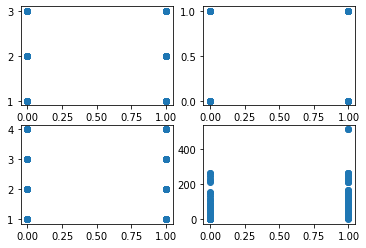

In [14]:
# # plt.scatter(y,X['Sex'])
# # plt.scatter(y,X['Embarked_C'])
fig = plt.figure()
for i in range(0,4):
  plt.subplot(2, 2, i+1)
  plt.scatter(y, X[X.columns[i]])
plt.show()

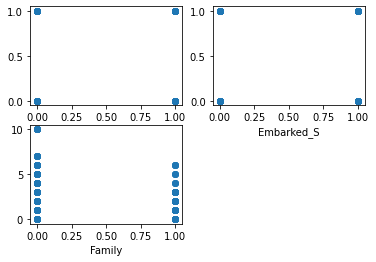

In [15]:
for i in range(4,7):
  plt.subplot(2, 2, i-3)
  plt.xlabel(X.columns[i])
  plt.scatter(y, X[X.columns[i]])
plt.show()

### Correlation Heat Map

(891, 7)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


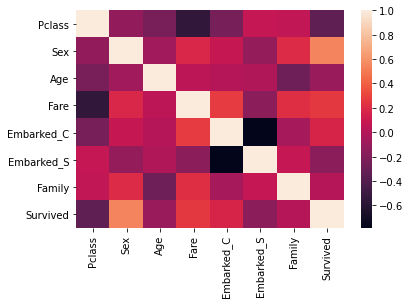

In [16]:
import seaborn as sns
print(X.shape)
joined = X.join([y])
corr_data = joined.corr()
sns.heatmap(corr_data)

## Feature Scaling

In [17]:
for i in range(0,len(X.columns)):
  print(X.columns[i],'\n',X[X.columns[i]].head())

Pclass 
 0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64
Sex 
 0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64
Age 
 0    3.0
1    3.0
2    3.0
3    3.0
4    3.0
Name: Age, dtype: float64
Fare 
 0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64
Embarked_C 
 0    0
1    1
2    0
3    0
4    0
Name: Embarked_C, dtype: uint8
Embarked_S 
 0    1
1    0
2    1
3    1
4    1
Name: Embarked_S, dtype: uint8
Family 
 0    1
1    1
2    0
3    1
4    0
Name: Family, dtype: int64


In [18]:
#Columns to be feature scaled are FARE and AGE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X[['Age','Fare']] = scaler.fit_transform(X[['Age','Fare']])
# X[['Fare']] = scaler.fit_transform(X[['Fare']])
#print(min(X['Age']),max(X['Age']),min(X['Fare']),max(X['Fare']))

X.head()

,Pclass,Sex,Age,Fare,Embarked_C,Embarked_S,Family
0,3,0,0.327364,-0.502445,0,1,1
1,1,1,0.327364,0.786845,1,0,1
2,3,1,0.327364,-0.488854,0,1,0
3,1,1,0.327364,0.420730,0,1,1
4,3,0,0.327364,-0.486337,0,1,0


## Splitting train and test data

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training, Testing and evaluating the model using various algorithms

### 1. Logistic Regression

In [20]:
#Training
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(solver='newton-cg')
classifier1.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#Testing
y_pred1 = classifier1.predict(X_test)

In [22]:
#Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred1)
print(cm)
print("Score: ",accuracy_score(y_test, y_pred1))

acc_dict = {}
acc_dict['LogisticRegression'] = accuracy_score(y_test, y_pred1)

[[96 14]
 [23 46]]
Score:  0.7932960893854749


### 2. KNearest neighbors classifier

In [23]:
#Training
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier2.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
#Testing
y_pred2 = classifier2.predict(X_test)

In [25]:
#Evaluation
cm = confusion_matrix(y_test, y_pred2)
print(cm)
print("Score: ",accuracy_score(y_test, y_pred2))

acc_dict['KNN'] = accuracy_score(y_test, y_pred2)

[[101   9]
 [ 24  45]]
Score:  0.8156424581005587


### 3. Support Vector Machine(linear kernel)

In [42]:
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'rbf',degree = 5)
classifier3.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
#Testing
y_pred3 = classifier3.predict(X_test)

In [44]:
#Evaluation
cm = confusion_matrix(y_test, y_pred3)
print(cm)
print("Score: ",accuracy_score(y_test, y_pred3))

acc_dict['SVC'] = accuracy_score(y_test, y_pred3)

[[96 14]
 [19 50]]
Score:  0.8156424581005587


### 4. Naive Bayes classifier

In [29]:
from sklearn.naive_bayes import GaussianNB
classifier4 = GaussianNB()
classifier4.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
#Testing
y_pred4 = classifier4.predict(X_test)

In [31]:
#Evaluation
cm = confusion_matrix(y_test, y_pred4)
print(cm)
print("Score: ",accuracy_score(y_test, y_pred4))

acc_dict['GaussianNB'] = accuracy_score(y_test, y_pred4)

[[93 17]
 [17 52]]
Score:  0.8100558659217877


### 5. Decision Tree classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier
classifier5 = DecisionTreeClassifier(criterion = 'entropy')
classifier5.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
#Testing
y_pred5 = classifier5.predict(X_test)

In [34]:
#Evaluation
cm = confusion_matrix(y_test, y_pred5)
print(cm)
print("Score: ",accuracy_score(y_test, y_pred5))

acc_dict['DecisionTree'] = accuracy_score(y_test, y_pred5)

[[98 12]
 [19 50]]
Score:  0.8268156424581006


### 6. Random Forest classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier6 = RandomForestClassifier(criterion = 'entropy', n_estimators = 100)
classifier6.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
#Testing
y_pred6 = classifier6.predict(X_test)

In [37]:
#Evaluation
cm = confusion_matrix(y_test, y_pred6)
print(cm)
print("Score: ",accuracy_score(y_test, y_pred6))

acc_dict['RandomForest'] = accuracy_score(y_test, y_pred6)

[[98 12]
 [18 51]]
Score:  0.8324022346368715


## Model Selection

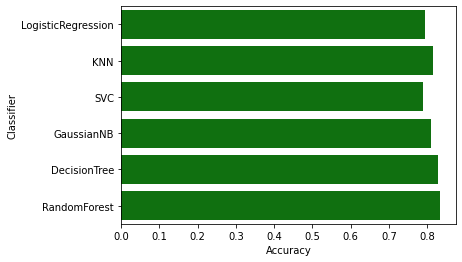

In [38]:
log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)
clfs = list(acc_dict.keys())
for clf in clfs:
  log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
  log = log.append(log_entry)

sns.barplot(x='Accuracy', y='Classifier', data=log, color="g")

## Preparing Test data for Prediction

In [39]:
pred = pd.read_csv("test.csv")
print(pred.isnull().sum())

#Handling nulls in AGE column
pred['Age'].fillna((pred['Age'].mean()), inplace=True)
print('After handling nulls AGE column: ',pred['Age'].isna().sum())

#dropping the NAME, TICKET, CABIN and PASSENGERID column
print("Before dropping NAME, TICKET, CABIN and PassengerId Cols ",pred.shape)
pred.drop(columns=['Name','Ticket','PassengerId','Cabin'],inplace=True)
print("After dropping NAME, TICKET, CABIN and PassengerId Cols ",pred.shape)

#Handling nulls in FARE column
pred['Fare'].fillna((pred['Fare'].mean()), inplace=True)
print('After handling nulls FARE column: ',pred['Fare'].isna().sum())

#Handling Categorical data in SEX column
pred['Sex'] = pred['Sex'].apply(male_female)

#Handling Categorical data in EMBARKED column
pred = pd.get_dummies(pred,columns=['Embarked'])
pred.drop(columns='Embarked_Q',inplace=True)

#Feature Engineering
pred['Family'] = pred['Parch'] + pred['SibSp']
#pred['Family'] = (pred["Family"] == 0)
pred.drop(columns=['Parch','SibSp'],inplace=True)
for i in range(len(pred['Age'])):
  if( pred['Age'][i] > 0 and pred['Age'][i] <= 5 ):
    pred['Age'][i] = baby
  elif( pred['Age'][i]>5 and pred['Age'][i] <= 20 ):
    pred['Age'][i] = child
  elif( pred['Age'][i]>20 and pred['Age'][i] <= 50):
    pred['Age'][i] = adult
  else:
    pred['Age'][i] = old

# pred = pd.get_dummies(pred,columns=['Age'])
# print('Additional columns added: ',list(pred.columns[-4:]))
# print('Before dropping one of the additional coulmns, shape of train data:',X.shape)
# pred.drop(columns='Age_1.0', inplace=True) #dummy variable trap
# print('After dropping one of the additional coulmns, shape of train data:',X.shape)

#Feature Scaling AGE and FARE columns
pred[['Age','Fare']] = scaler.transform(pred[['Age','Fare']])
#pred[['Fare']] = scaler.transform(pred[['Fare']])

print(pred.shape)

pred.head(10)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
After handling nulls AGE column:  0
Before dropping NAME, TICKET, CABIN and PassengerId Cols  (418, 11)
After dropping NAME, TICKET, CABIN and PassengerId Cols  (418, 7)
After handling nulls FARE column:  0
(418, 7)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to b

,Pclass,Sex,Age,Fare,Embarked_C,Embarked_S,Family
0,3,0,0.327364,-0.490783,0,0,0
1,3,1,0.327364,-0.507479,0,1,1
2,2,0,1.854491,-0.453367,0,0,0
3,3,0,0.327364,-0.474005,0,1,0
4,3,1,0.327364,-0.401017,0,1,2
5,3,0,-1.199763,-0.462679,0,1,0
6,3,1,0.327364,-0.494810,0,0,0
7,2,0,0.327364,-0.064516,0,1,2
8,3,1,-1.199763,-0.502864,1,0,0
9,3,0,0.327364,-0.162169,0,1,2


## Final Prediction

In [45]:
#I downloaded the output of a person who's among top5% in the competition and checked how similar my results are to his results.
#Based on that similarity, I uploaded my solution on Kaggle to get ~0.78 score and to stand among top 37% on the leader board.
y_pred = []

y_pred.append(classifier1.predict(pred))
y_pred.append(classifier2.predict(pred))
y_pred.append(classifier3.predict(pred))
y_pred.append(classifier4.predict(pred))
y_pred.append(classifier5.predict(pred))
y_pred.append(classifier6.predict(pred))
#print(y_pred)

import itertools  
truth_val = pd.read_csv('submission.csv')
for (i,j) in zip(y_pred,clfs):
  print(accuracy_score(truth_val.iloc[:,1],i[:])*100,'\t',j)

90.19138755980862 	 LogisticRegression
84.44976076555024 	 KNN
92.10526315789474 	 SVC
84.688995215311 	 GaussianNB
85.4066985645933 	 DecisionTree
88.99521531100478 	 RandomForest


In [0]:
#Using SVC for final prediction as it is more close to the reference dataset.
Ids = np.arange(892,1310)
df = pd.DataFrame(data={'PassengerId':Ids,"Survived": y_pred[2]})
df.to_csv("./titanic_results.csv", sep=',',index=False)